<a href="https://colab.research.google.com/github/BenjaminVegaM/ADA-Informes/blob/main/Informe_2_MergeSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de ordenamiento

**Entrada**: Secuencia de n números $[a_1,a_2,...,a_n]$

**Salida**: Permutación ordenada de la secuencia de entrada: $[a_1',a_2',...,a_n']$, de tal manera que $a_1'\leq a_2' \leq... \leq a_n'$.

Los algoritmos de ordenamiento son utilizados para ordenar, comunmente de menor a mayor, un conjunto de valores numéricos desordenados.

# 2. MergeSort

El siguiente código muestra una implementación del algoritmo **MergeSort**.

## 2.1 Código de MergeSort

In [387]:
# MergeSort Code
def merge_sort(a, recursiones = 0, comparaciones = 0, verbose = False):
    b = []
    c = []
    if verbose == True: print("\nContador de Recursiones: ", recursiones)
    if verbose == True: print("Arreglo de entrada:", a)

    if len(a) == 1:
        if verbose == True: print("Arreglo es de largo 1")
        return a, recursiones, comparaciones #El arreglo sólo tiene un elemento

    x = (int)((len(a))/2) #El índice de la mitad del arreglo

    if verbose == True: print("Indice de la mitad:", x)
    if verbose == True: print("Dividiendo arreglo")

    if verbose == True: print("\nOrdenando izquierda:", a[0:x])
    recursiones += 1
    b, recursiones, comparaciones = merge_sort(a[0:x], recursiones, comparaciones, verbose) #Ordena la parte izquierda del arreglo

    if verbose == True: print("\nOrdenando derecha:", a[x:len(a)])
    recursiones += 1
    c, recursiones, comparaciones = merge_sort(a[x:len(a)], recursiones, comparaciones, verbose) #Ordena la parte derecha del arreglo

    if verbose == True: print("\nJuntando", b, "con", c)
    a, comparaciones = merge(b, c, comparaciones, verbose) #Combina y ordena ambos subarreglos ordenados

    return a, recursiones, comparaciones

In [388]:
# Ejemplo
a = [9,2,4,5]
recursiones = comparaciones = 0
print("Entrada: ",a)
c, recursiones, comparaciones = merge_sort(a, recursiones, comparaciones, False)
print("Salida: ",c)
print("Número de Recursiones:", recursiones)
print("Número de Comparaciones:", comparaciones)

Entrada:  [9, 2, 4, 5]
Salida:  [2, 4, 5, 9]
Número de Recursiones: 6
Número de Comparaciones: 5


## 2.2. Descripción del Algoritmo
El algoritmo recibe como entrada un arreglo de $n$ números que se desea ordenar, luego el algoritmo:

1. Verifica si el arreglo es de largo $1$, si es así retorna el arreglo y el contador de iteraciones.

2. De lo contrario divide el arreglo en 2 partes iguales (con la excepción de arreglos de largo impar, en cuyo caso uno de los arreglos será de largo mayor en 1) y se llama a la función merge_sort recursivamente dos veces; la primera con la mitad izquierda del arreglo y la siguiente con la mitad derecha y ambos resultados son almacenados en 2 nuevos arreglos diferentes.

3. Luego se llama a la función merge con los dos arreglos obtenidos y el resultado se almacena en el arreglo original. Esta función une dos arreglos recibidos en uno nuevo de manera ordenada y lo retorna.

4. Al final, se retorna el arreglo ordenado y un contador de las recurciones realizadas.

> Cuando la variable `verbose` es `True` se muestra información para ver lo que pasa paso a paso dentro de la función.

> La función Merge se explica más detalladamente más adelante.

## 2.3. Ejemplo

Consideremos, por ejemplo, el arreglo:

$a = [3,5,4,2]$

Primero verifica si el largo del arreglo es igual a 1, como este no es el caso divide el arreglo en dos arreglos:

$b = [3,5]$ y $c = [4,2]$

Despues al llamar a la función **MergeSort** el camino se divide en dos partes que, con el fin de ser entendidos mejor, se llamarán "Rama 1" y "Rama 2".

En la Rama 1 se llama a la función **MergeSort** con el arreglo $b$, en esta nuevamente se verifica si el arreglo es de largo 1, como no es así entonces el arreglo es nuevamente dividido en 2:

$b1 = [3]$ y $b2 = [5]$

Luego nuevamente se llama a la función **MergeSort** y vuelve a dividirse, en la Rama 1.1 y la Rama 1.2.

En la Rama 1.1 la función verifica si el arreglo es de largo 1, esto es cierto así que se retorna el arreglo sin realizar nada más.

Como la Rama 1.1 ya finalizó, ahora procede con la Rama 1.2 en la cual se trabaja al arreglo $b2 = [5]& el cual, al igual que en la Rama 1.1, es de largo 1 por lo que se retorna sin más.

En la Rama 1 ahora que se finalizó de llamar a ambos **MergeSort**, se llama a la función **Merge** con los arreglos $b1$ y $b2%.

En la función **Merge** se recorren ambos arreglos de manera simultanea, comparando cada valor uno a uno entre ambos arreglos y almacenandolos en un nuevo arreglo de manera ordenada. Como ambos arreglos son de largo 1 esta tarea es sencilla y solo se debe comparar una vez, quedando el arreglo:

$b3 = [3,5]$

Ahora que la Rama 1 finalizó se procede con la Rama 2, en la cual se verifica si el arreglo $c$ es de largo 1, este no es el caso por lo que se divide el arreglo en 2 partes:

$c1 = [4]$ y $c2 = [2]$

Luego se llama a la función **MergeSort** dos veces con los arreglos $c1$ y $c2$ respectivamente, dividiendose también este camino en 2 partes nuevamente; Rama 2.1 y Rama 2.2. En estas ramas se realiza el mismo trabajo que en la Rama 1, resultando en llamar a la función **Merge** con los arreglos $c1$ y $c2$, los cuales son ordenados en un nuevo arreglo:

$c3 = [2,4]$

Ahora que ambas ramas finalizaron, nuevamente se llama a la función **Merge** con los arreglos $b3$ y $c3$ como entrada.

En la función **Merge** se recorren ambos arreglos y se ordenan en uno nuevo, quedando el arreglo:

$d = [2,4,3,5]$

Finalmente ambas ramas han finalizado por lo que se retorna el arreglo $d$ y finaliza el algoritmo.

## 2.4. Ejecución del Algoritmo Paso a Paso (verbose = True)

Al utilizar la opción `verbose=True` se puede ver paso a paso lo que le ocurre al arreglo en cada iteración del algoritmo.

In [390]:
a = [9,2,4,5,3,6]
recursiones = comparaciones = 0
print("Entrada: ",a)
c, recursiones, comparaciones = merge_sort(a, recursiones, comparaciones, True)
print("Salida: ",c)
print("Número de Recursiones:", recursiones)
print("Número de Comparaciones:", comparaciones)

Entrada:  [9, 2, 4, 5, 3, 6]

Contador de Recursiones:  0
Arreglo de entrada: [9, 2, 4, 5, 3, 6]
Indice de la mitad: 3
Dividiendo arreglo

Ordenando izquierda: [9, 2, 4]

Contador de Recursiones:  1
Arreglo de entrada: [9, 2, 4]
Indice de la mitad: 1
Dividiendo arreglo

Ordenando izquierda: [9]

Contador de Recursiones:  2
Arreglo de entrada: [9]
Arreglo es de largo 1

Ordenando derecha: [2, 4]

Contador de Recursiones:  3
Arreglo de entrada: [2, 4]
Indice de la mitad: 1
Dividiendo arreglo

Ordenando izquierda: [2]

Contador de Recursiones:  4
Arreglo de entrada: [2]
Arreglo es de largo 1

Ordenando derecha: [4]

Contador de Recursiones:  5
Arreglo de entrada: [4]
Arreglo es de largo 1

Juntando [2] con [4]

Comparando 2 y 4
Agregado valor 2 => [2]

Agregando valores sobrantes.

Arreglo ordenado: [2, 4] 


Juntando [9] con [2, 4]

Comparando 9 y 2
Agregado valor 2 => [2]

Comparando 9 y 4
Agregado valor 4 => [2, 4]

Agregando valores sobrantes.

Arreglo ordenado: [2, 4, 9] 


Ordenando

## 3. Merge
El siguiente código muestra una implementación de la función complementaria **Merge** del algoritmo **MergeSort**.


## 3.1. Código de Merge

In [352]:
# Merge Code
def merge(a, b, comparaciones = 0, verbose = False):
    i = j = 0
    c = []
    while i < len(a) and j < len(b):

        if verbose == True: print("\nComparando", a[i], "y", b[j])
        comparaciones += 1
        if a[i] <= b[j]:
            c.append(a[i])
            if verbose == True: print("Agregado valor", a[i], "=>",c)
            i+=1
        else:
            c.append(b[j])
            if verbose == True: print("Agregado valor", b[j], "=>",c)
            j+=1

    if verbose == True: print("\nAgregando valores sobrantes.")
    while i < len(a):
        c.append(a[i])
        i+=1

    while j < len(b):
        c.append(b[j])
        j+=1
    
    if verbose == True: print("\nArreglo ordenado:",c,"\n")

    return c, comparaciones

In [393]:
# Ejemplo
a = [3,5,6,8,9]
b = [1,2,4,7,10,11]
c = []
comparaciones = 0
print("Entrada:\na=",a,"\nb=",b)
c, comparaciones = merge(a, b, comparaciones, False)
print("Salida: ",c)
print("Número de Comparaciones:", comparaciones)

Entrada:
a= [3, 5, 6, 8, 9] 
b= [1, 2, 4, 7, 10, 11]
Salida:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Número de Comparaciones: 9


## 3.2. Descripción del Algoritmo
El algoritmo recibe como entrada dos arreglos $a$ y $b$ de largo $na$ y $nb$ respectivamente que se quieren juntar y ordenar en un nuevo arreglo $c$ de largo $na + nb$, luego cada número de ambos arreglos son comparados entre sí de izquiera a derecha y son agregados uno a uno hasta que todos estén ordenados en el nuevo arreglo:

1. El algoritmo crea dos variables llamadas $i$ y $k$ las cuales empiezan en 0.

2. Luego el algoritmo realiza una iteración mientras tanto el valor de $i$ sea menor a $na$ y el valor de $k$ sea menor a $nb$, en esta iteración el algoritmo compara el elemento en la posición $i$ del arreglo $a$ ($a[i]$) con el que está en la posición $k$ del arreglo $b$ ($b[k]$).

3. Si el elemento $a[i]$ es menor que el elemento $b[k]$, el elemento $a[i]$ es agregado al arreglo $c$ y el valor de $i$ aumenta en 1. Si la condición no se cumple entonces el elemento $b[k]$ es agregado al arreglo $c$ y el valor de $k$ aumenta en 1.

4. Como se mencionó en el punto 2, el algoritmo detendrá la iteración cuando el valor de $i$ sea menor a $na$ o el valor de $k$ sea menor a $nb$.

5. Cuando finaliza esta iteración, el algoritmo agregará los valores restantes del arreglo que no esté vacío en el arreglo $c$, para esto primero realizará dos iteraciones; la primera se realizará mientras $i$ sea menor a $na$ y en ella se agregará el valor de $a[i]$ al arreglo $c$ y sumará 1 a $i$, la segunda se realizará mientras $k$ sea menor a $nb$ y en ella se agregará el valor de $b[k]$ al arreglo $c$ y sumará 1 a $k$.

6. Al final, se retorna el arreglo ordenado y un contador con el número de comparaciones realizadas.

> Cuando la variable `verbose` es `True` se muestra información para ver lo que pasa paso a paso dentro de la función.

In [392]:
a = [11, 6, 1, 10, 32, 21, 50, 43, 9, 18, 20, 25, 2]
recursiones = comparaciones = 0
print("Entrada: ",a)
a, recursiones, comparaciones = merge_sort(a, recursiones, comparaciones, False)
print("Salida: ",a)
print("Número de recursiones:", recursiones)
print("Número de Comparaciones:", comparaciones)

Entrada:  [11, 6, 1, 10, 32, 21, 50, 43, 9, 18, 20, 25, 2]
Salida:  [1, 2, 6, 9, 10, 11, 18, 20, 21, 25, 32, 43, 50]
Número de recursiones: 24
Número de Comparaciones: 33


# 4. Tiempo de ejecución

### **Teorema (Tiempo de ejecución).**

*El algoritmo **MergeSort** tiene un **tiempo de ejecución de** $O(n*log(n))$ en el peor caso.*

## Prueba del teorema

Para comprobar el teorema, se puede utilizar el **Árbol de recurrencia**, para ello primero se debe obtener la fórmula de recurrencia del algoritmo.

### Fórumla de recurrencia

La fórmula de recurrencia **T(N)** del algoritmo se obtiene analizando sus partes:

- El algoritmo divide el problema ($n$) en $2$ subproblemas, los cuales son $1/2$ del problema original, por lo cual el algoritmo tardará $2T(n/2)$ en resolver ambos sub-problemas.

- El algoritmo se demora $O(1)$ en dividir el problema ya que esto es constante en tiempo.

- Luego el algoritmo llama a la función **Merge** para combinarlos, la cual tiene una complejidad lineal $O(n)$.

Gracias a este analisis se obtiene que $T(n) = 2T(n/2) + O(n)$.

### Árbol de recurrencia

Ahora con la fórmula de recurrencia se puede proceder a utilizar el árbol de recurrencia para demostrar la correctitud del teorema.

Ahora se puede crear el árbol subdividiendo en cada paso $T(n)$ recursivamente en sus componentes, es decir: $T(n)=2T(n/2)+n$.

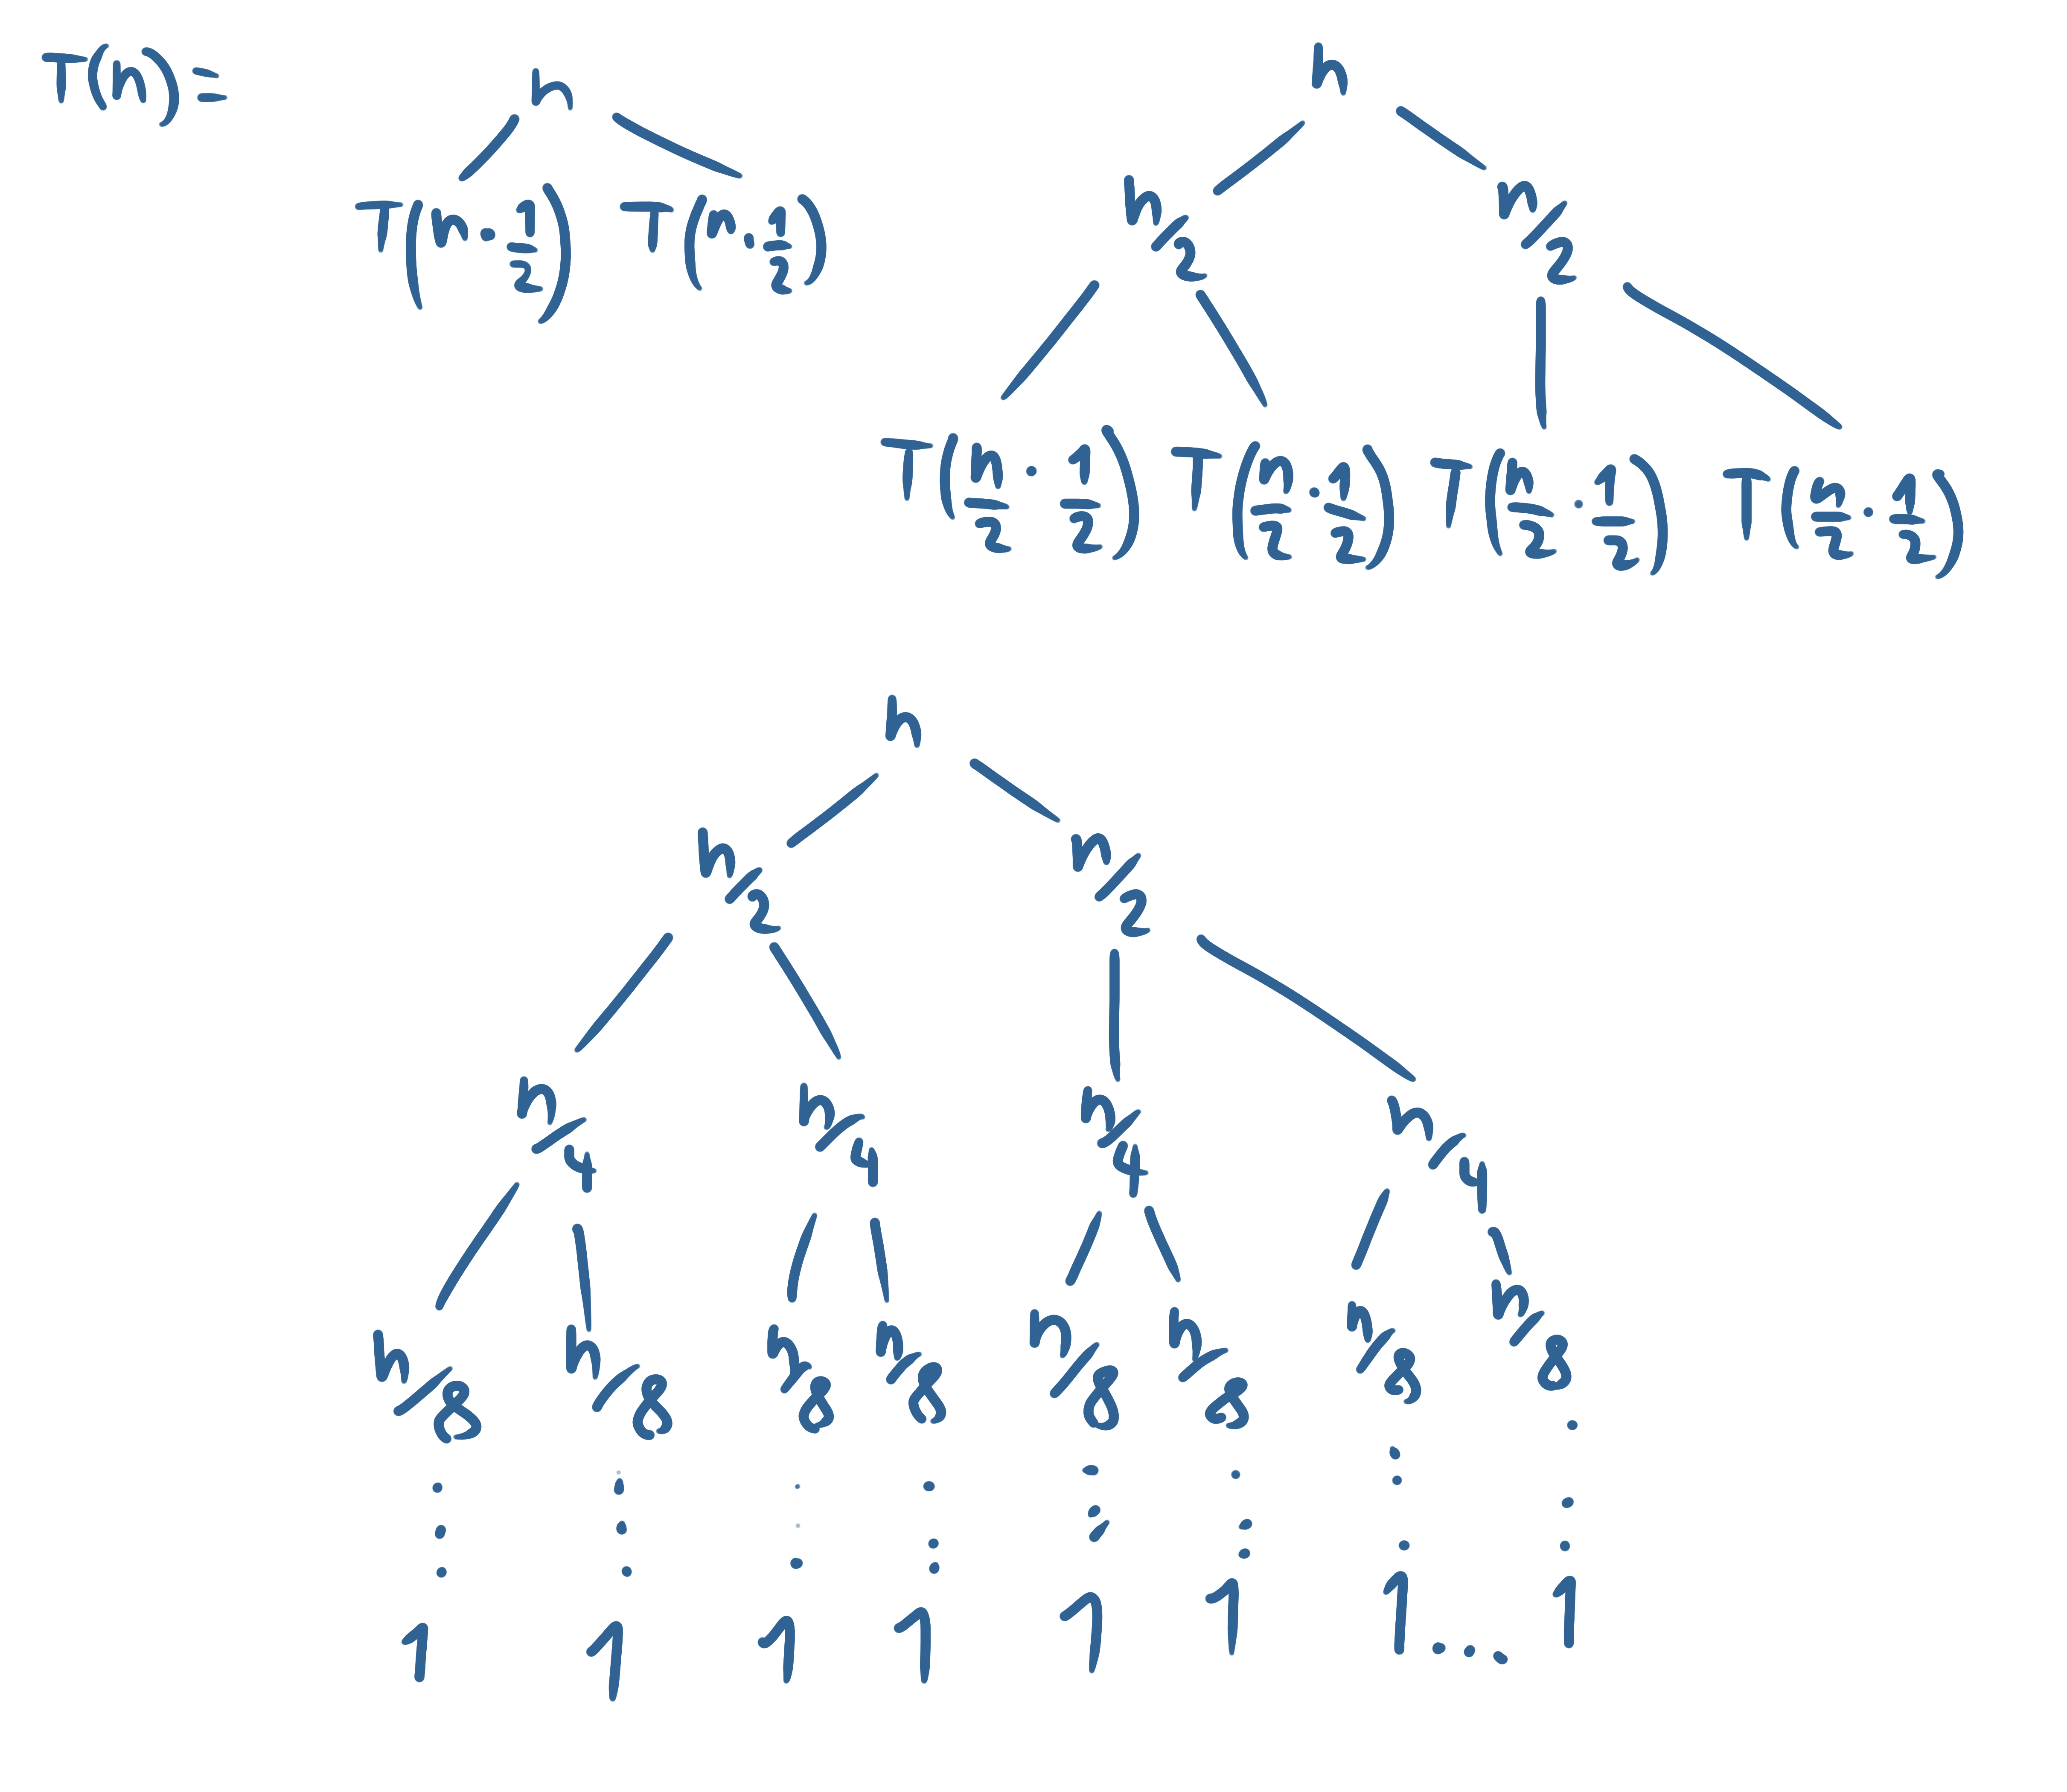

Al analizar el árbol se puede apreciar que la altura del árbol es $log_2(n)$ y que la suma de todos los valores individuales de cada piso es $n$.

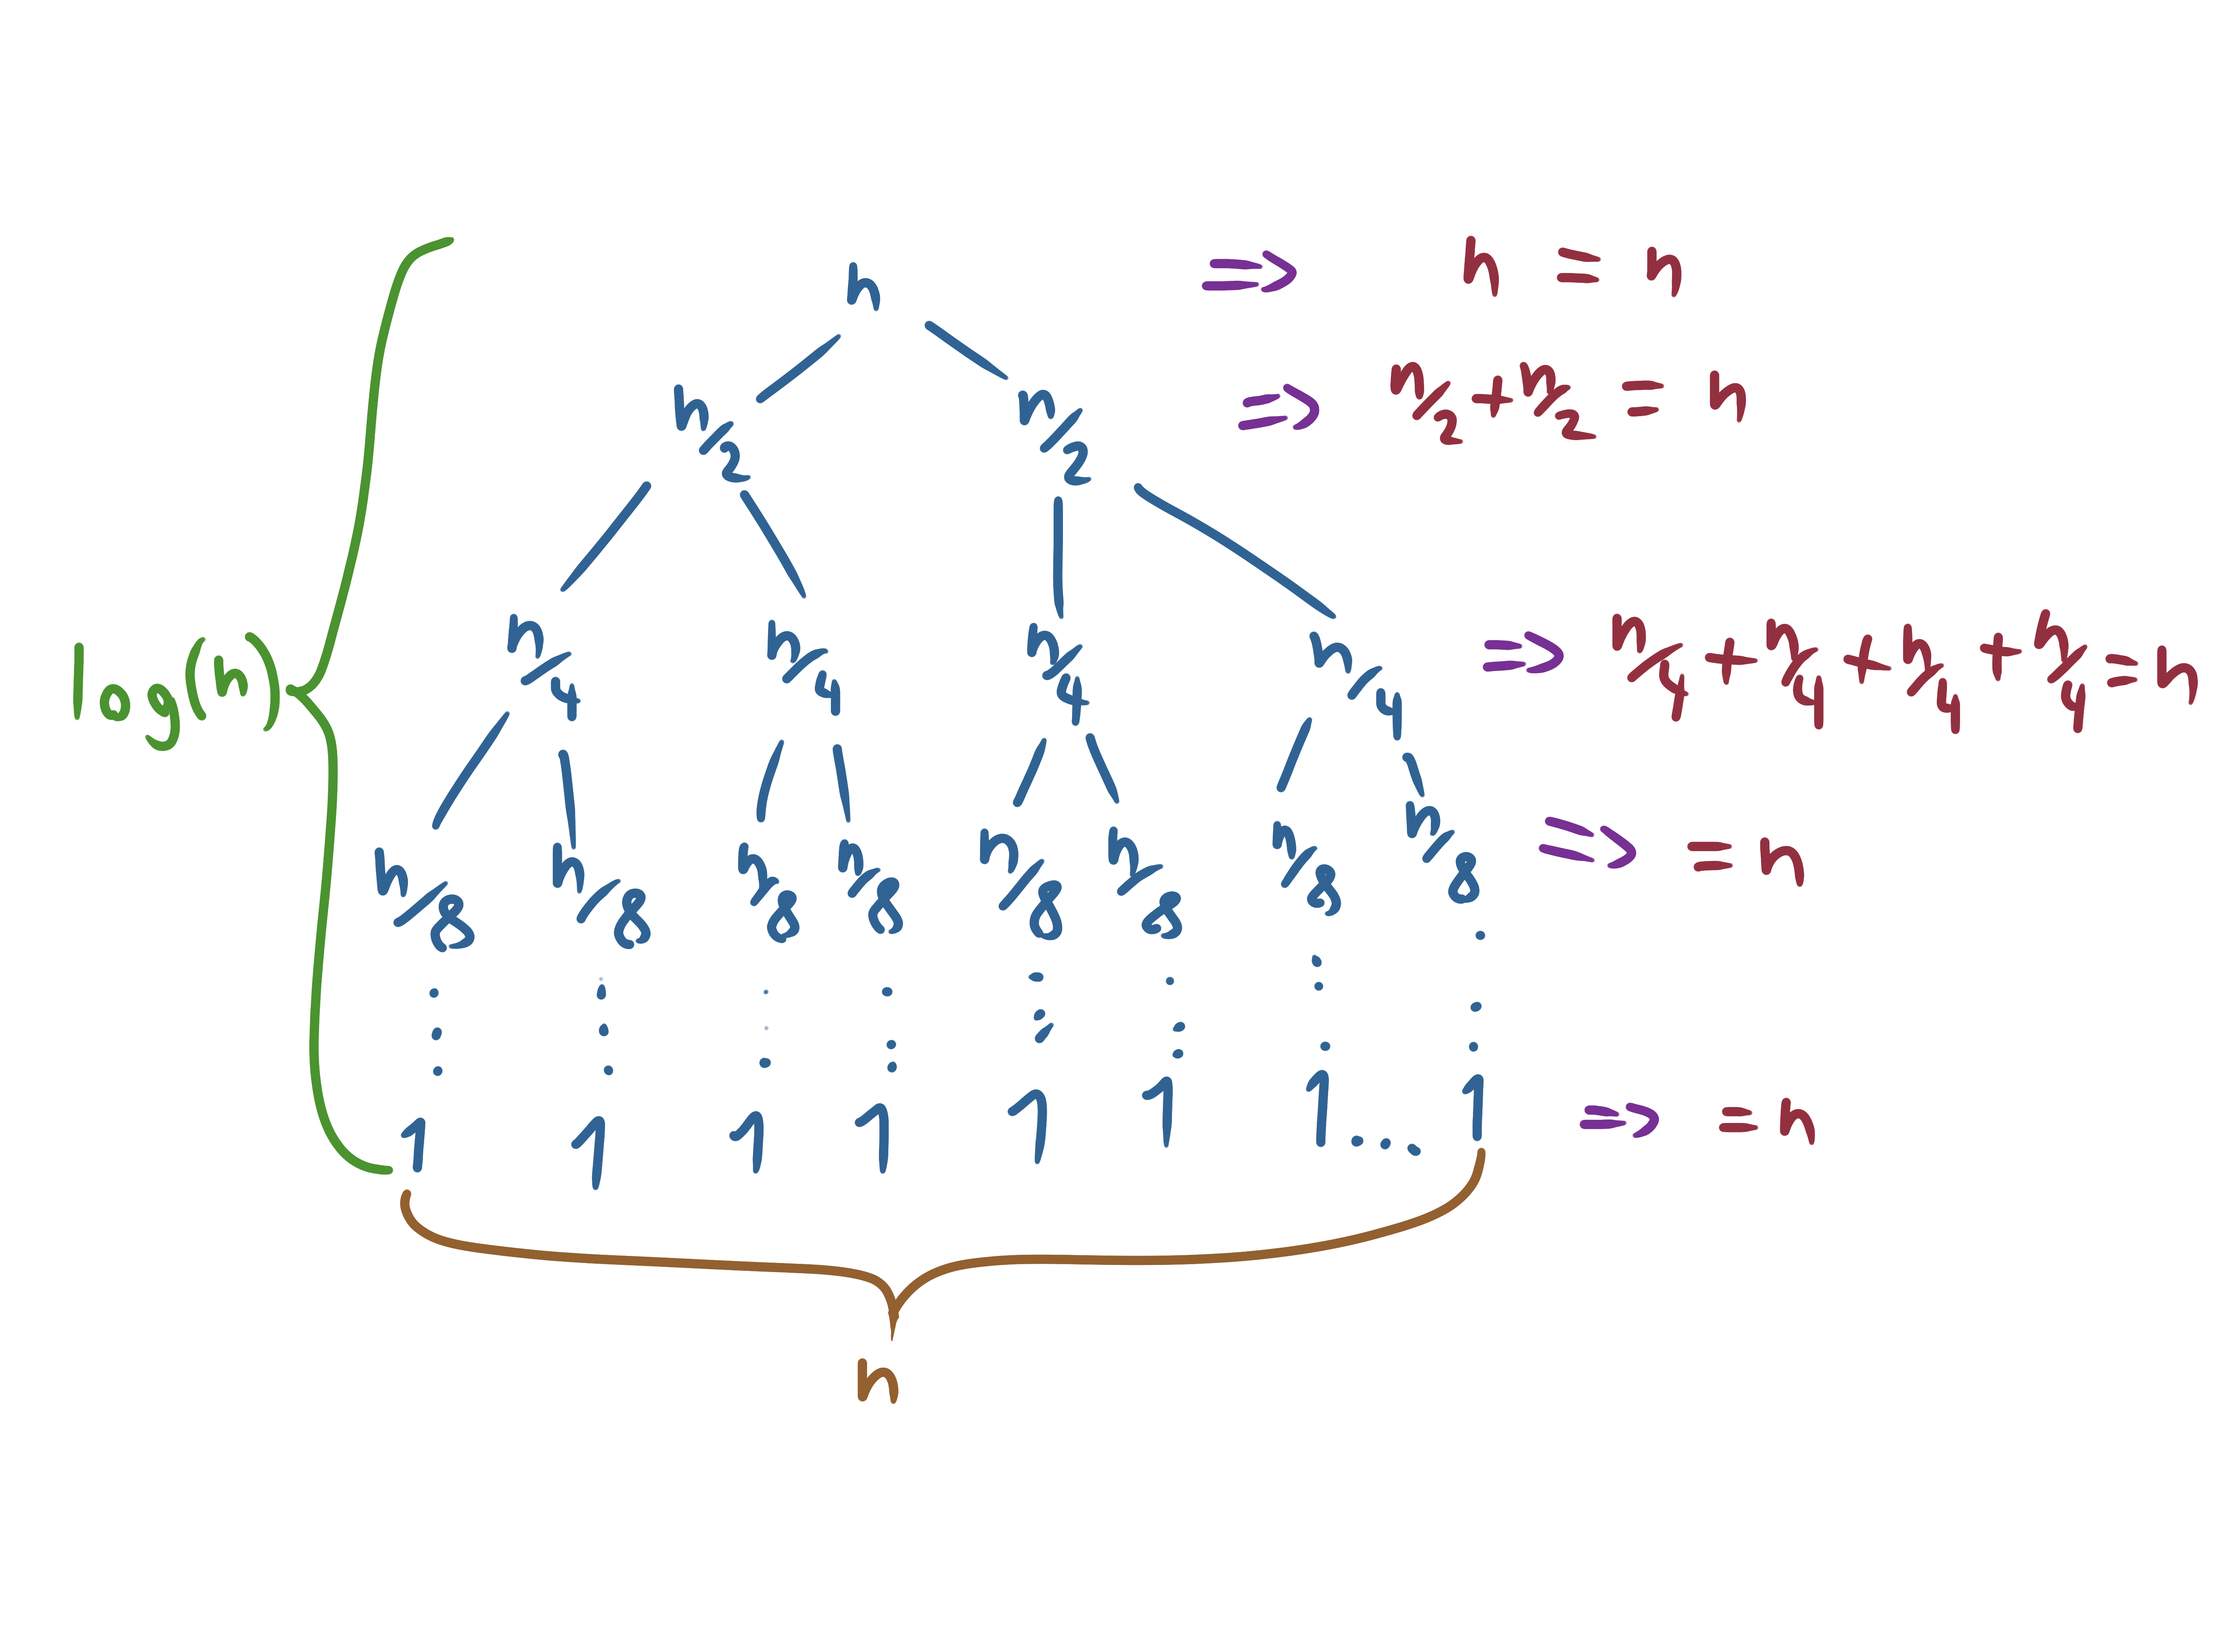

Por ello, el tiempo de ejecución sería $n$ multiplicado por el nivel que es igual a $log_2(n)$, por ello quedaría $n*log_2(n) = O(n*log(n)$.

## Ejemplo

In [396]:
a = [8,6,2,9,7,1]
recursiones = comparaciones = 0
print("Entrada: ",a)
a, recursiones, comparaciones = merge_sort(a, recursiones, comparaciones, True)
print("\nSalida: ",a)
print("Número de Recursiones:", recursiones)

Entrada:  [8, 6, 2, 9, 7, 1]

Contador de Recursiones:  0
Arreglo de entrada: [8, 6, 2, 9, 7, 1]
Indice de la mitad: 3
Dividiendo arreglo

Ordenando izquierda: [8, 6, 2]

Contador de Recursiones:  1
Arreglo de entrada: [8, 6, 2]
Indice de la mitad: 1
Dividiendo arreglo

Ordenando izquierda: [8]

Contador de Recursiones:  2
Arreglo de entrada: [8]
Arreglo es de largo 1

Ordenando derecha: [6, 2]

Contador de Recursiones:  3
Arreglo de entrada: [6, 2]
Indice de la mitad: 1
Dividiendo arreglo

Ordenando izquierda: [6]

Contador de Recursiones:  4
Arreglo de entrada: [6]
Arreglo es de largo 1

Ordenando derecha: [2]

Contador de Recursiones:  5
Arreglo de entrada: [2]
Arreglo es de largo 1

Juntando [6] con [2]

Comparando 6 y 2
Agregado valor 2 => [2]

Agregando valores sobrantes.

Arreglo ordenado: [2, 6] 


Juntando [8] con [2, 6]

Comparando 8 y 2
Agregado valor 2 => [2]

Comparando 8 y 6
Agregado valor 6 => [2, 6]

Agregando valores sobrantes.

Arreglo ordenado: [2, 6, 8] 


Ordenando

En este caso el arreglo de largo $6$ fue dividido en 2 un total de $5$ veces, con un total de $10$ recursiones.

En todos los casos se deberán realizar $2(n-1)$ recursiones ya que el algoritmo siempre divide el problema aunque ya esté solucionado.

In [407]:
a = [1,2,3]
recursiones = comparaciones = 0
print("Entrada: ",a)
a, recursiones, comparaciones = merge_sort(a, recursiones, comparaciones, False)
print("\nSalida: ",a)
print("Número de Recursiones:", recursiones)

Entrada:  [1, 2, 3]

Salida:  [1, 2, 3]
Número de Recursiones: 4


# 5. Correctitud


## 5.1. Teorema (Correctitud de Merge)

La función **Merge** genera un arreglo: $[a_1',a_2',a_3',...,a_n']$, con los mismos elementos de los subarreglos de entrada ordenados de menor a mayor, es decir, $a_1' \leq a_2' \leq a_3' \leq ... \leq a_n'$.

## 5.2. Prueba del Teorema

**Merge** obtiene dos subarreglos $a[n]$ y $b[m]$ los cuales se fusionarán en un nuevo arreglo $c[n+m]$ de forma que el arreglo resultante esté ordenado, esto comparando los elementos de los subarreglos que correspondan.

Al comienzo de cada iteración el subarreglo $a[i]$ contiene $n$ elementos de forma ordenada.

### Inicialización

Antes de la primera iteración del ciclo los primeros elementos de los subarreglos $a$ y $b$ corresponden a los menores elementos de los arreglos en los que se encuentran que no han sido copiados en el arreglo final.

### Mantención

Para que cada iteración mantenga la invariante de bucle, se comparan los elementos seleccionados de los arreglos $a$ y $b$ que corresponderían a $a[i]$ y $b[j]$. Supongamos que en este caso $a[i] < b[j]$, entonces $a[i]$ se añade al final del arreglo $c$, luego el valor de $i$ aumenta en 1, para reestablecer la invariante de ciclo para la siguiente iteración. En el caso de que $a[i] > b[j]$ se repetiría el proceso, pero se añadiría $b[j]$ a $c$ y $k$ aumentaría en 1.

### Correctitud

Como la propiedad del bucle invariante es cierta, al final de la n-ésima iteración el arreglo $c$ tendrá todos los elementos de $a[0...i-1]$ y $b[0...j-1]$ de manera ordenada, por lo que $c = [a_1',a_2',a_3',...,a_n']$.


## 5.3. Inducción para la correctitud del MergeSort

La hipótesis $T(n)$ se basa en que **MergeSort** retorna un arreglo de $n$ elementos ordenados de menor a mayor.

### Caso base $n = 1$
Si $T(1)$ la función **MergeSort** retorna un sólo elemento, por lo que se cumpliría la condición.

### Paso inductivo
Ahora hay que probar si $T(m)$ es verdadero para $m < n$, entonces lo será también para $T(n)$.

Si tenemos un arreglo de $n$ elementos, el algoritmo dividirá ese arreglo en $m_1 = [n/2]$ y $m_2 = [n/2]$ y los ordenará usando **MergeSort**. Luego podemos asumir que los arreglos serán ordenados correctamente.

Luego los arreglos serán fusionados con la función **Merge**. Que según lo mencionado anteriormente, ya que **Merge** es correcto, retornará la combinación de los arreglos con los elementos ordenados de menor a mayor. Por lo tanto **MergeSort** es correcto.

# 6. Experimentos

## 6.1. Número de comparaciones

La gráfica de acontinuación muestra una comparación entre:

* la cantidad de comparaciones realizadas en el peor caso calculadas matemáticamente,
* la cantidad de comparaciones realizadas en el mejor caso calculadas matemáticamente
* y la cantidad de comparaciones realizadas en casos de prueba realizados con entradas aleatorias

para problemas con arreglos de entrada de largo $n \in [2,50]$ en los cuales el valor de los elementos es elejido aleatoriamente desde un conjunto de números entre 1 y 100.

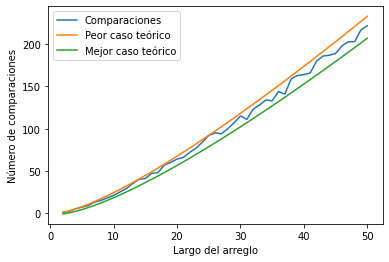

In [409]:
import matplotlib.pyplot as plt
import math
import random

rangeS = 2
rangeF = 51
x=[n for n in range(rangeS,rangeF)]
# Peor Caso
y1=[( n*math.log2(n) - (n-1) ) for n in range(rangeS,rangeF)]
# Mejor caso
y2=[( n*math.log2(n) - (n + n/2) ) for n in range(rangeS,rangeF)]
# Muestras
yc=[];


for n in range(rangeS,rangeF):
  a = random.sample(range(1, 100), n)
  recursiones = comparaciones = 0
  a, recursiones, comparaciones = merge_sort(a, recursiones, comparaciones, False)
  yc.append(comparaciones)

plt.plot(x,yc)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Comparaciones", "Peor caso teórico", "Mejor caso teórico"])

plt.xlabel('Largo del arreglo')
plt.ylabel('Número de comparaciones')
plt.show()

### Analisis del gráfico

Los resultados que muestra el grafico indican que la cantidad de comparaciones en promedio se mantienen en un rango igualado entre el mejor y el peor caso posible, y este rango crece lentamente por lo que se puede decir que este algoritmo no es excepcionalmente bueno ni malo para cualquier largo de arreglo de entrada.

## 6.2. Tiempo de ejecución experimental

El siguiente gráfico muestra el comportamiento del tiempo de ejecución del algoritmo en relación al tamaño del arreglo de entrada, esto utilizando problemas generados aleatoriamente de arreglos de largo $n \in [5,500]$

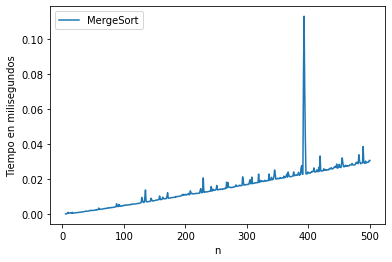

In [ ]:
import datetime
from timeit import repeat

x=[];
y=[];

for n in range(5,501):
  a = random.sample(range(1, 1000), n)

  #la función repeat está ejecutando 20 veces insert_sort con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import merge_sort", stmt=f"merge_sort({a})", repeat=1, number=10)

  x.append(n)
  y.append(t)


plt.plot(x,y)
plt.legend(["MergeSort"])

plt.xlabel('n')
plt.ylabel('Tiempo en milisegundos')
plt.show()

### Análisis del gráfico

Del gráfico se puede ver que al igual que en el análisis teórico, el tiempo de ejecución experimental se comporta de manera logarítmica en relación al tamaño del arreglo de entrada.

Cabe notar que existen un par de puntos muy altos en la gráfica los cuales son probablemente debidos al comportamiento impredecible de los procesadores y quizás a otros procesos que también lo están ocupando.

# 6.3. Comparación de tiempo de ejecución con InsertSort

El siguiente gráfico muestra una comparación entre los tiempos de ejecución de los algoritmos **MergeSort** e **InsertSort**.


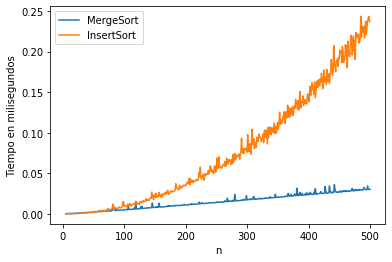

In [386]:
import datetime
import random
from timeit import repeat

# Código para bubblesort
def insert_sort(a, verbose=False):
    counter = 0
    lenght = len(a)

    if verbose == True: print("input array:", a)

    for i in range(1,lenght):
        c = i
        if verbose == True: print("\nIteración",i)
        while a[c] < a[c-1] and c > 0:
            counter+=1
            a[c], a[c-1] = a[c-1], a[c]
            c-=1
            if verbose == True: print("\n",a)
        if verbose == True: print("\nFin de la iteración",i)
# Fin del código de bubblesort

x=[];
y=[];
yb=[];

for n in range(5,501):
  a = random.sample(range(1, 1000), n)
  x.append(n)

  #la función repeat está ejecutando 20 veces insert_sort con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import merge_sort", stmt=f"merge_sort({a})", repeat=1, number=10)
  y.append(t)
  t = repeat(setup="from __main__ import insert_sort", stmt=f"insert_sort({a})", repeat=1, number=10)
  yb.append(t)

plt.plot(x,y)
plt.plot(x,yb)
plt.legend(["MergeSort", "InsertSort"])

plt.xlabel('n')
plt.ylabel('Tiempo en milisegundos')
plt.show()

### Analisis del gráfico

En el gráfico se puede apreciar que el algoritmo **MergeSort** tiene un menor tiempo de ejecución en comparación a **InsertSort**, especialmente con tamaños de arreglo más grande donde la diferencia aumenta exponencialmente, gracias a esto se puede confirmar que el algoritmo **MergeSort** es mejor para ordenar arreglos rápidamente, especialmente para arreglos grandes.